In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("C:/Users/user/Desktop/projects/Parkinsosn's disease/parkinsons.data")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Matrix column entries (attributes):
#### name - ASCII subject name and recording number
#### MDVP:Fo(Hz) - Average vocal fundamental frequency
#### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#### MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#### MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
#### MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#### NHR, HNR - Two measures of the ratio of noise to tonal components in the voice status - The health status of the subject (one) - Parkinson's, (zero) - healthy
#### RPDE, D2 - Two nonlinear dynamical complexity measures
#### DFA - Signal fractal scaling exponent
#### spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


#### There are some outliers as we can see some attributes have huge difference in their 75 percentile value and maximum value. 

In [8]:
df['status'].value_counts()                    #imbalanced data

1    147
0     48
Name: status, dtype: int64

In [9]:
df.drop('name',axis=1,inplace= True)

C:\Users\user\AppData\Local\Temp\ipykernel_6520\872813206.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


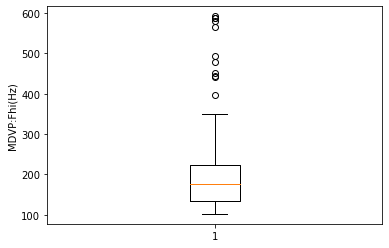

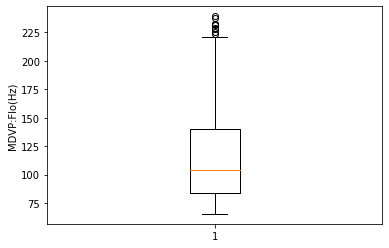

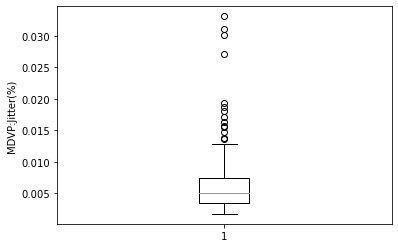

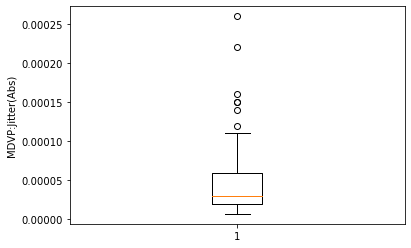

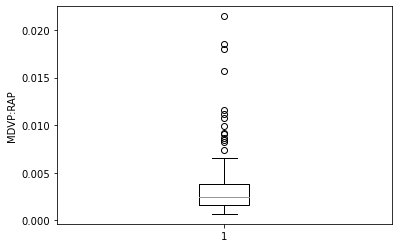

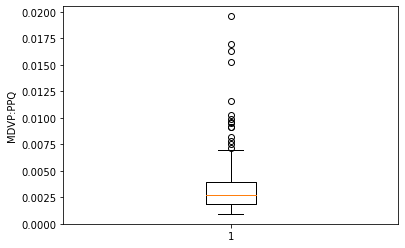

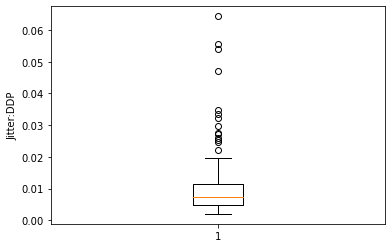

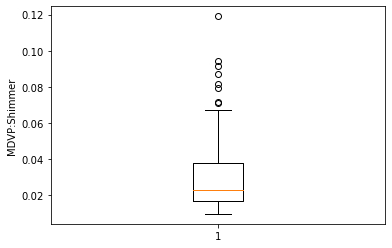

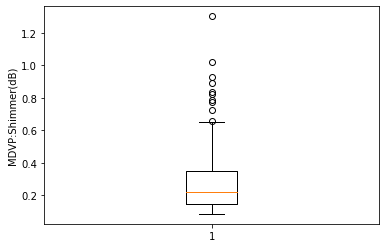

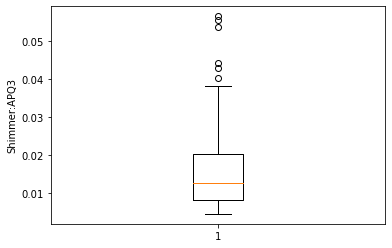

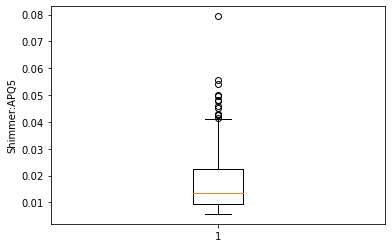

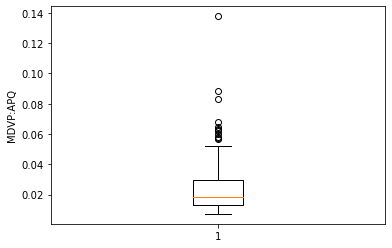

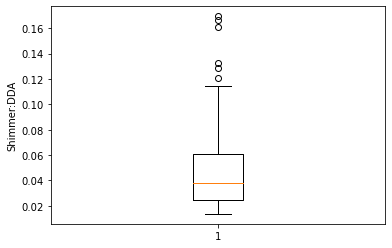

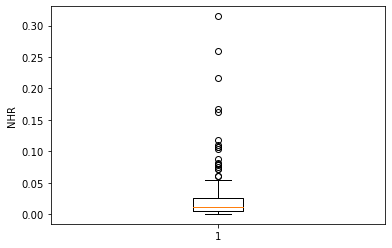

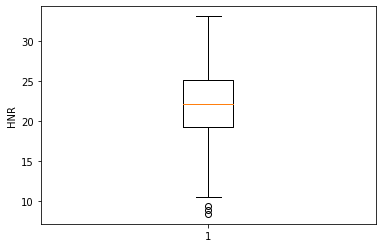

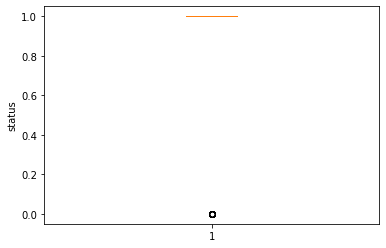

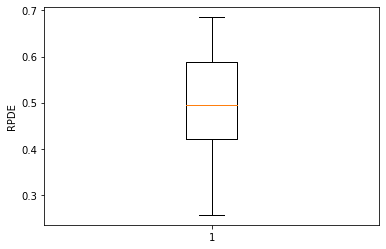

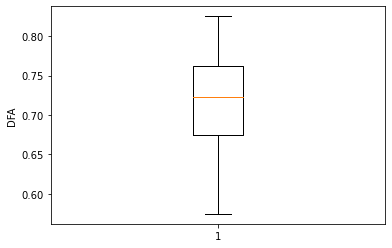

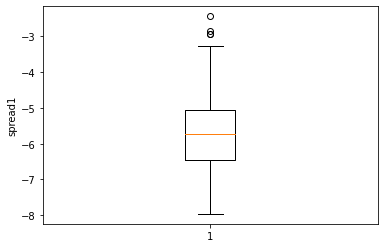

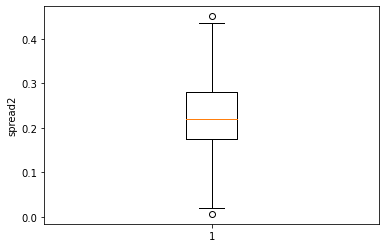

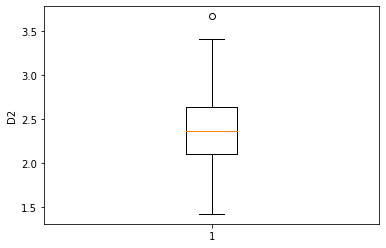

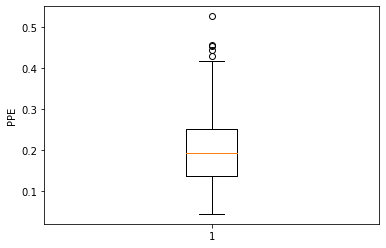

In [10]:
for i in df.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    plt.ylabel(i)

<AxesSubplot:ylabel='status'>

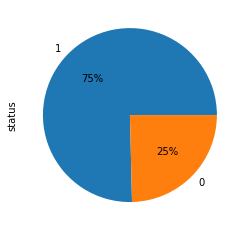

In [11]:
df['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,

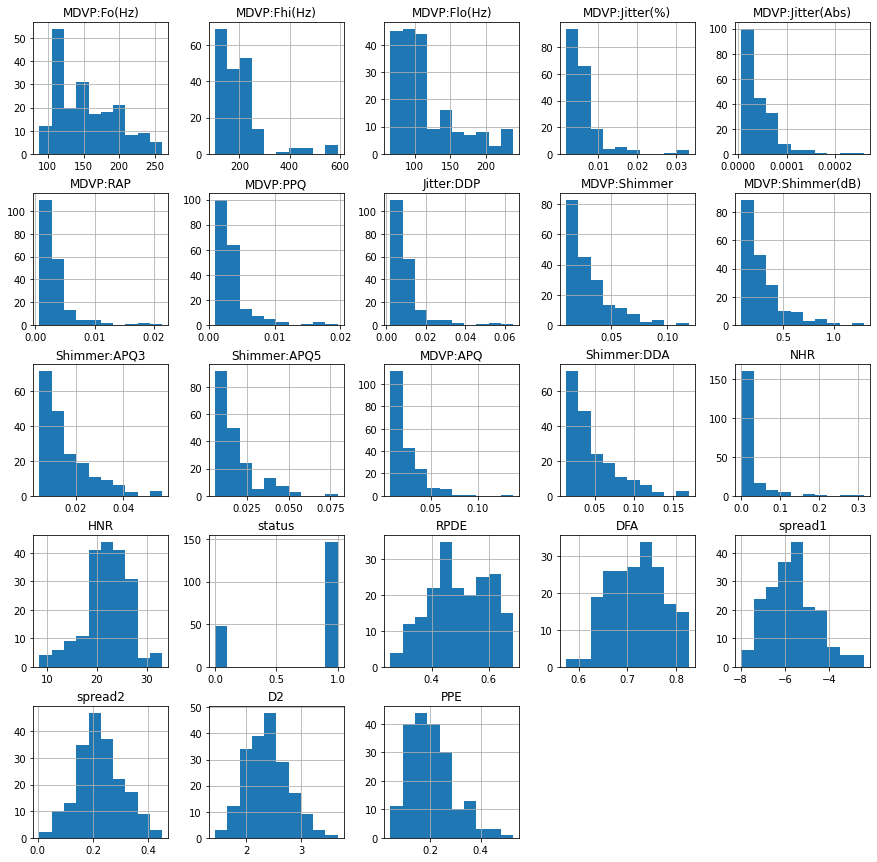

In [12]:
df.hist(figsize=(15,15))

#### We can see some of the data is normally distributed and most of the attributes are right skewed

## Feature Transformation          

In [13]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method='yeo-johnson', standardize=True)
df1=power.fit_transform(df)

In [14]:
df2=pd.DataFrame(df1,columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'])
df2.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.815958,-0.311120,-1.281536,0.878534,1.130083,0.663545,1.324360,0.662953,1.085947,1.121394,...,0.952998,0.501288,-0.272097,0.571429,-0.822120,1.773280,0.850536,0.500133,-0.143409,0.955919
1,-0.731904,-0.516385,0.284969,1.267285,1.349557,1.079283,1.661243,1.078124,1.597639,1.638319,...,1.529645,0.322433,-0.702004,0.571429,-0.415996,1.851626,1.432375,1.295257,0.343677,1.613839
2,-0.935588,-1.015745,0.223439,1.403575,1.531164,1.340639,1.799632,1.340747,1.377275,1.306776,...,1.342574,-0.142778,-0.358709,0.571429,-0.682548,1.958394,1.150913,1.017915,-0.033218,1.353128
3,-0.935810,-0.808214,0.218189,1.317769,1.531164,1.209928,1.664960,1.208464,1.448320,1.404059,...,1.430943,-0.106132,-0.360286,0.571429,-0.635383,1.846334,1.400901,1.278972,0.134286,1.615895
4,-0.960331,-0.697220,0.198281,1.699271,1.805783,1.612331,1.946523,1.610985,1.654507,1.558665,...,1.668792,0.210965,-0.580558,0.571429,-0.798451,1.924983,1.668091,0.121307,-0.060266,1.881035


array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,

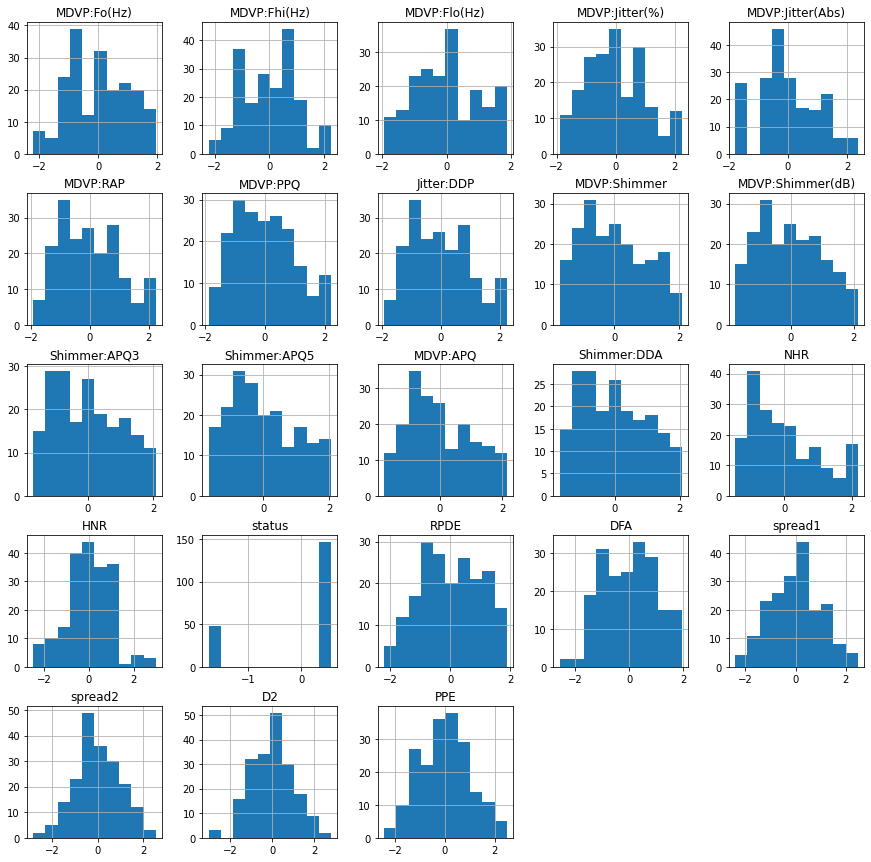

In [15]:
df2.hist(figsize=(15,15))

C:\Users\user\AppData\Local\Temp\ipykernel_6520\3817950613.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


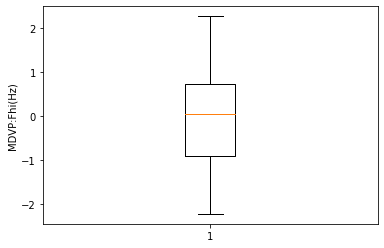

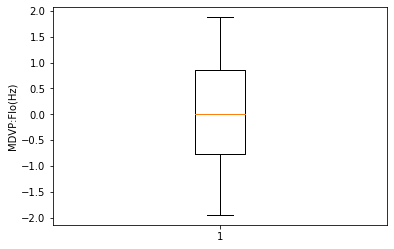

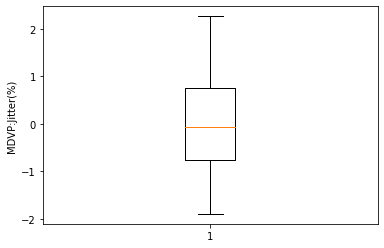

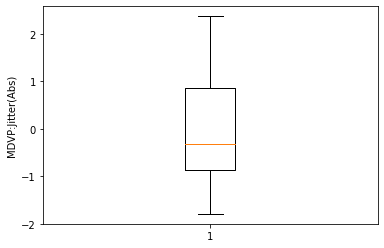

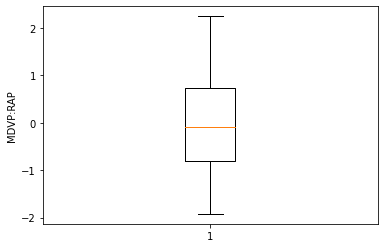

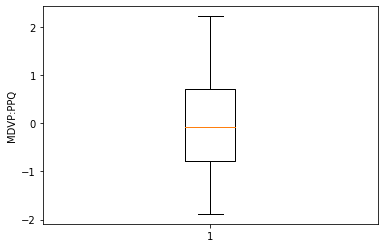

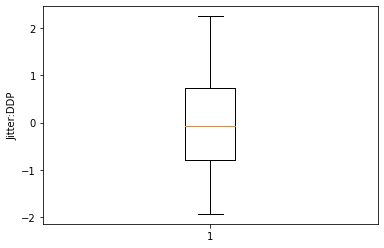

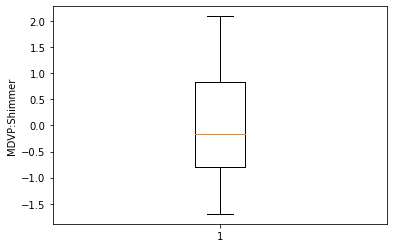

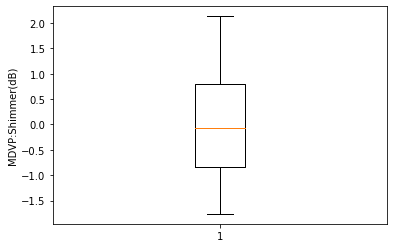

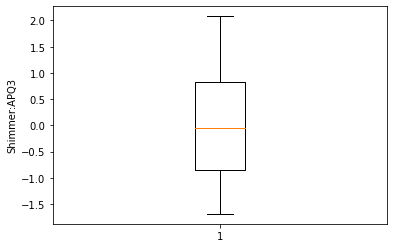

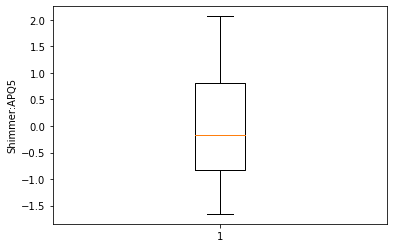

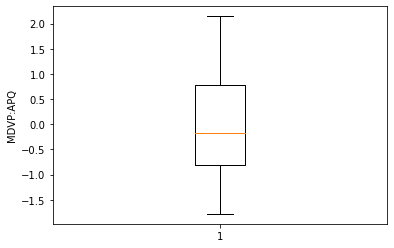

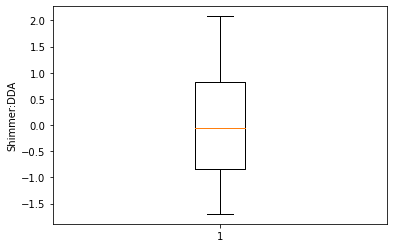

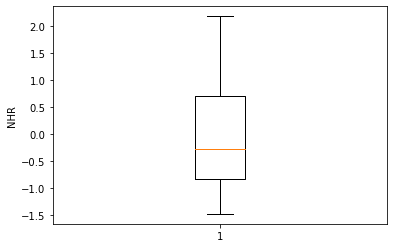

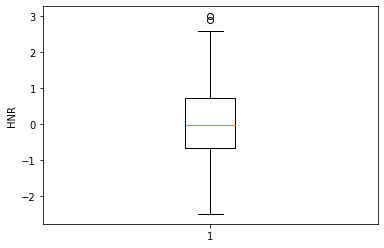

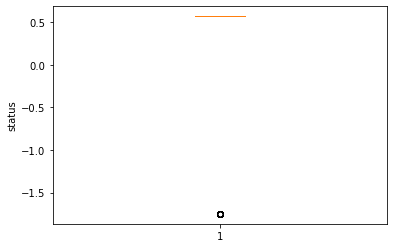

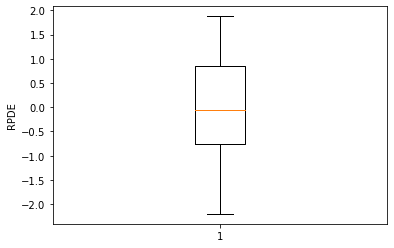

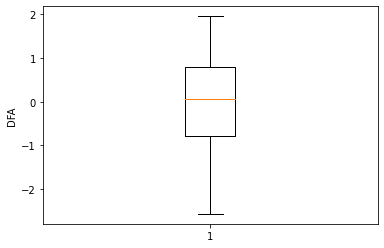

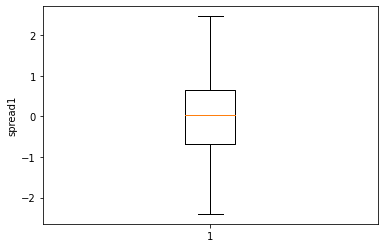

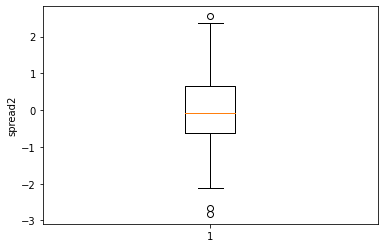

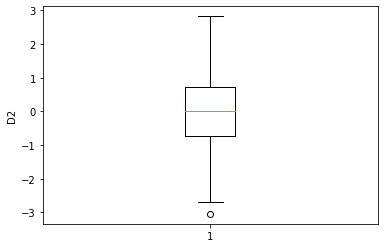

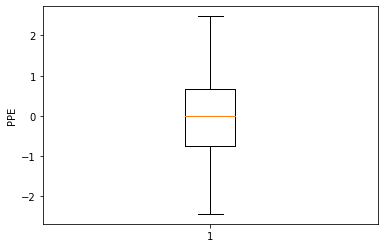

In [16]:
for i in df2.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(df2[i])
    plt.ylabel(i)

In [17]:
X=df.loc[:,df.columns!='status'].values[:,1:]
y=df.loc[:,'status'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)

## Handling Imbalanced data

In [19]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train,y_train= smt.fit_resample(X_train,Y_train)

## Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
pred_logistic_test = lr.predict(x_test)
pred_logistic_train = lr.predict(x_train)

In [22]:
accuracy_score(y_train, pred_logistic_train)           #training accuracy

0.8217391304347826

In [23]:
accuracy_score(y_test, pred_logistic_test)              #test accuracy

0.8205128205128205

In [24]:
confusion_matrix(y_test, pred_logistic_test)

array([[ 5,  2],
       [ 5, 27]], dtype=int64)

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [27]:
pred_knn_test = knn.predict(x_test)
pred_knn_train = knn.predict(x_train)

In [28]:
accuracy_score(y_train,pred_knn_train)

0.9260869565217391

In [29]:
accuracy_score(y_test,pred_knn_test)

0.717948717948718

## Decision Tree

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [32]:
accuracy_score(y_train, pred_dt_train)                              #overfitting

1.0

In [33]:
accuracy_score(y_test, pred_dt_test)

0.8717948717948718

## Random Forest

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
train_pred_rf = rf.predict(x_train)
test_pred_rf = rf.predict(x_test)

In [36]:
accuracy_score(y_train,train_pred_rf)

1.0

In [37]:
accuracy_score(y_test,test_pred_rf)

0.9487179487179487

In [38]:
confusion_matrix(y_test,test_pred_rf)

array([[ 5,  2],
       [ 0, 32]], dtype=int64)